### Importing Necessary library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data importing and preparing

In [3]:
bank_data = pd.read_csv('bank-full.csv', sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
for col in bank_data.columns:
    print(bank_data[col].groupby(bank_data[col]).count())

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
balance
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64
housing
no     20081
yes    25130
Name: housing, dtype: int64
loan
no     37967
yes     7244
Name

In [8]:
36959/45211 * 100

81.74780473778506

the feature **poutcoume** is 81% data is loss

<AxesSubplot:xlabel='poutcome', ylabel='count'>

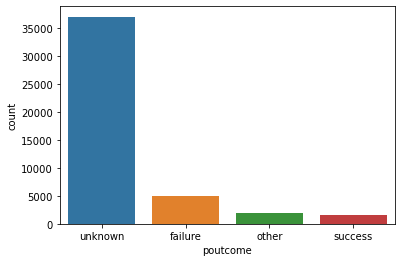

In [9]:
sns.countplot(x = bank_data.poutcome ,data = bank_data)

In [10]:
del bank_data['poutcome']

<AxesSubplot:xlabel='contact', ylabel='count'>

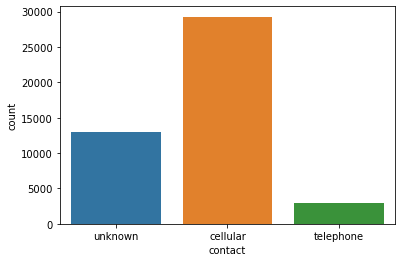

In [11]:
sns.countplot(x = bank_data.contact ,data = bank_data)

In [12]:
bank_data['contact'].groupby(bank_data['contact']).count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64

In [13]:
13020/45211 *100

28.798301298356595

In [14]:
del bank_data['contact']

<AxesSubplot:xlabel='job', ylabel='count'>

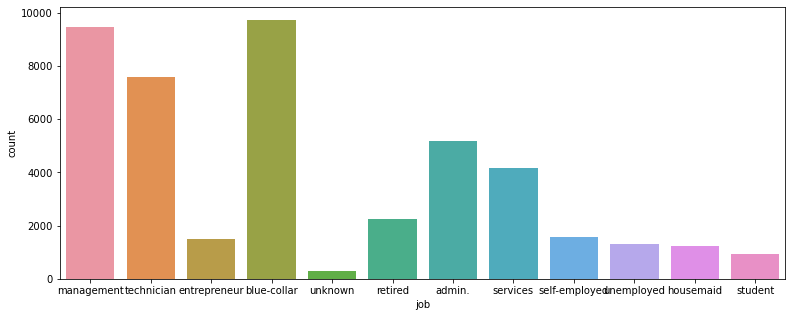

In [15]:
plt.figure(figsize=(13,5))
sns.countplot(x = bank_data.job ,data = bank_data)

In [16]:
bank_data['job'].groupby(bank_data['job']).count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [17]:
bank_data['job'].replace('unknown',np.nan,inplace=True)

In [18]:
bank_data.shape

(45211, 15)

In [19]:
bank_data.dropna(inplace=True)

In [20]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [21]:
bank_data.shape

(44923, 15)

In [22]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [23]:
bank_data['education'].groupby(bank_data['education']).count()

education
primary       6800
secondary    23131
tertiary     13262
unknown       1730
Name: education, dtype: int64

In [24]:
bank_data.shape

(44923, 15)

<AxesSubplot:xlabel='education', ylabel='count'>

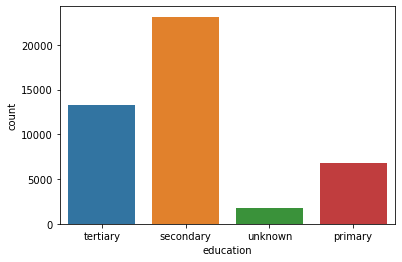

In [25]:
sns.countplot(x = bank_data.education , data = bank_data)

In [26]:
bank_data['education'].replace('unknown',np.nan,inplace=True)

In [27]:
bank_data.dropna(inplace=True)

In [28]:
bank_data.shape

(43193, 15)

### Data Preprocessing

##### using label encoding

In [29]:
bank_data_copy = bank_data.copy()

In [30]:
bank_data_copy

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [31]:
bank_data_copy.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_data_copy['job_enc'] = le.fit_transform(bank_data_copy['job'])
bank_data_copy['marital_enc'] = le.fit_transform(bank_data_copy['marital'])
bank_data_copy['education_enc'] = le.fit_transform(bank_data_copy['education'])
bank_data_copy['default_enc'] = le.fit_transform(bank_data_copy['default'])
bank_data_copy['house_enc'] = le.fit_transform(bank_data_copy['housing'])
bank_data_copy['loan_enc'] = le.fit_transform(bank_data_copy['loan'])
bank_data_copy['month_enc'] = le.fit_transform(bank_data_copy['month'])
bank_data_copy['y_enc'] = le.fit_transform(bank_data_copy['y'])

In [33]:
bank_data_copy.drop(labels=['job','marital','default','education','housing','loan','month','y'],axis = 1, inplace=True)

In [34]:
bank_data_copy.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,house_enc,loan_enc,month_enc,y_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,8,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,8,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,8,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,0,8,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,1,8,0


In [35]:
bank_data_copy.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
job_enc          int64
marital_enc      int64
education_enc    int64
default_enc      int64
house_enc        int64
loan_enc         int64
month_enc        int64
y_enc            int64
dtype: object

### Detecting and removing outlier

In [36]:
numerical_feature = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

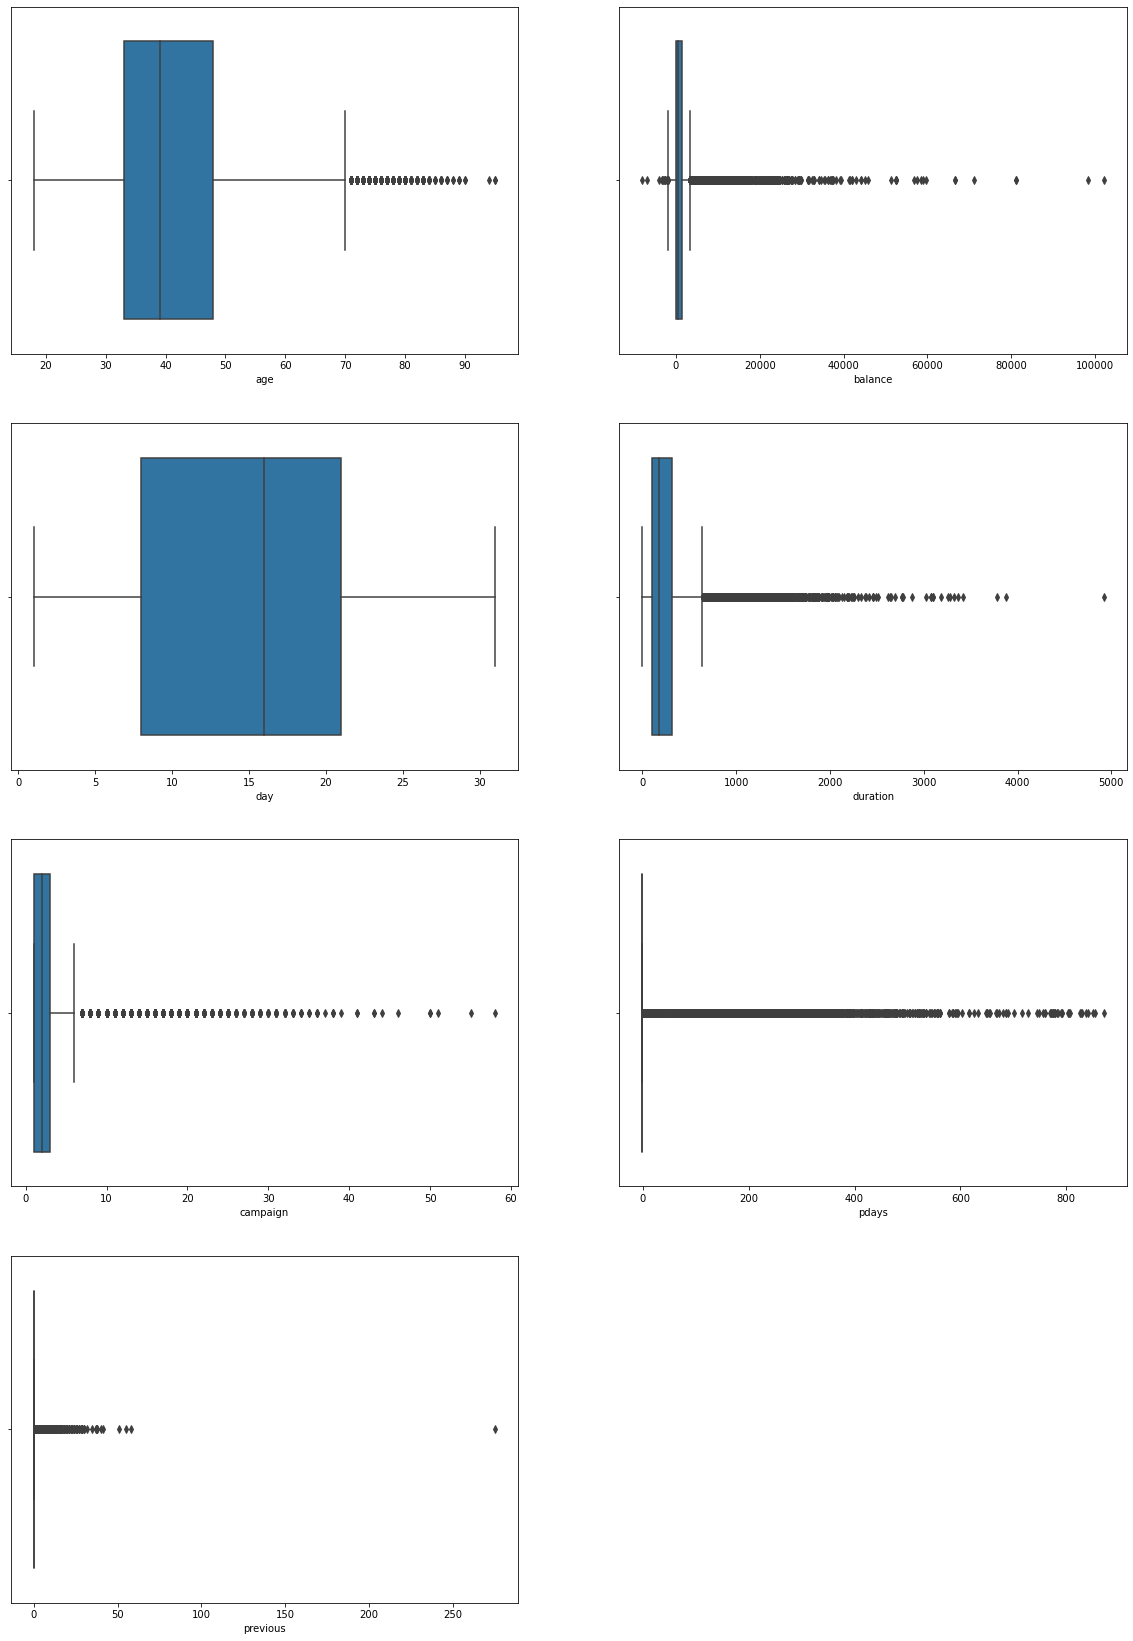

In [37]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in numerical_feature:
    ax = plt.subplot(8,2,plotnumber)
    sns.boxplot(bank_data_copy[feature])
    plotnumber += 1

In [38]:
bank_data_copy.groupby(['previous'], sort=True)['previous'].count()

previous
0      35281
1       2651
2       2004
3       1096
4        693
5        443
6        268
7        195
8        127
9         88
10        63
11        60
12        42
13        36
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         4
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64

In [39]:
bank_data_cleaned = bank_data_copy.copy()

In [40]:
bank_data_copy.groupby(['duration'], sort=True)['duration'].count()

duration
0        3
1        2
2        3
3        4
4       13
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: duration, Length: 1558, dtype: int64

removing outlier from **duration and previous**

In [41]:
bank_data_cleaned = bank_data_cleaned[(bank_data_cleaned['duration'] < 4000) & (bank_data_cleaned['previous'] < 60)]

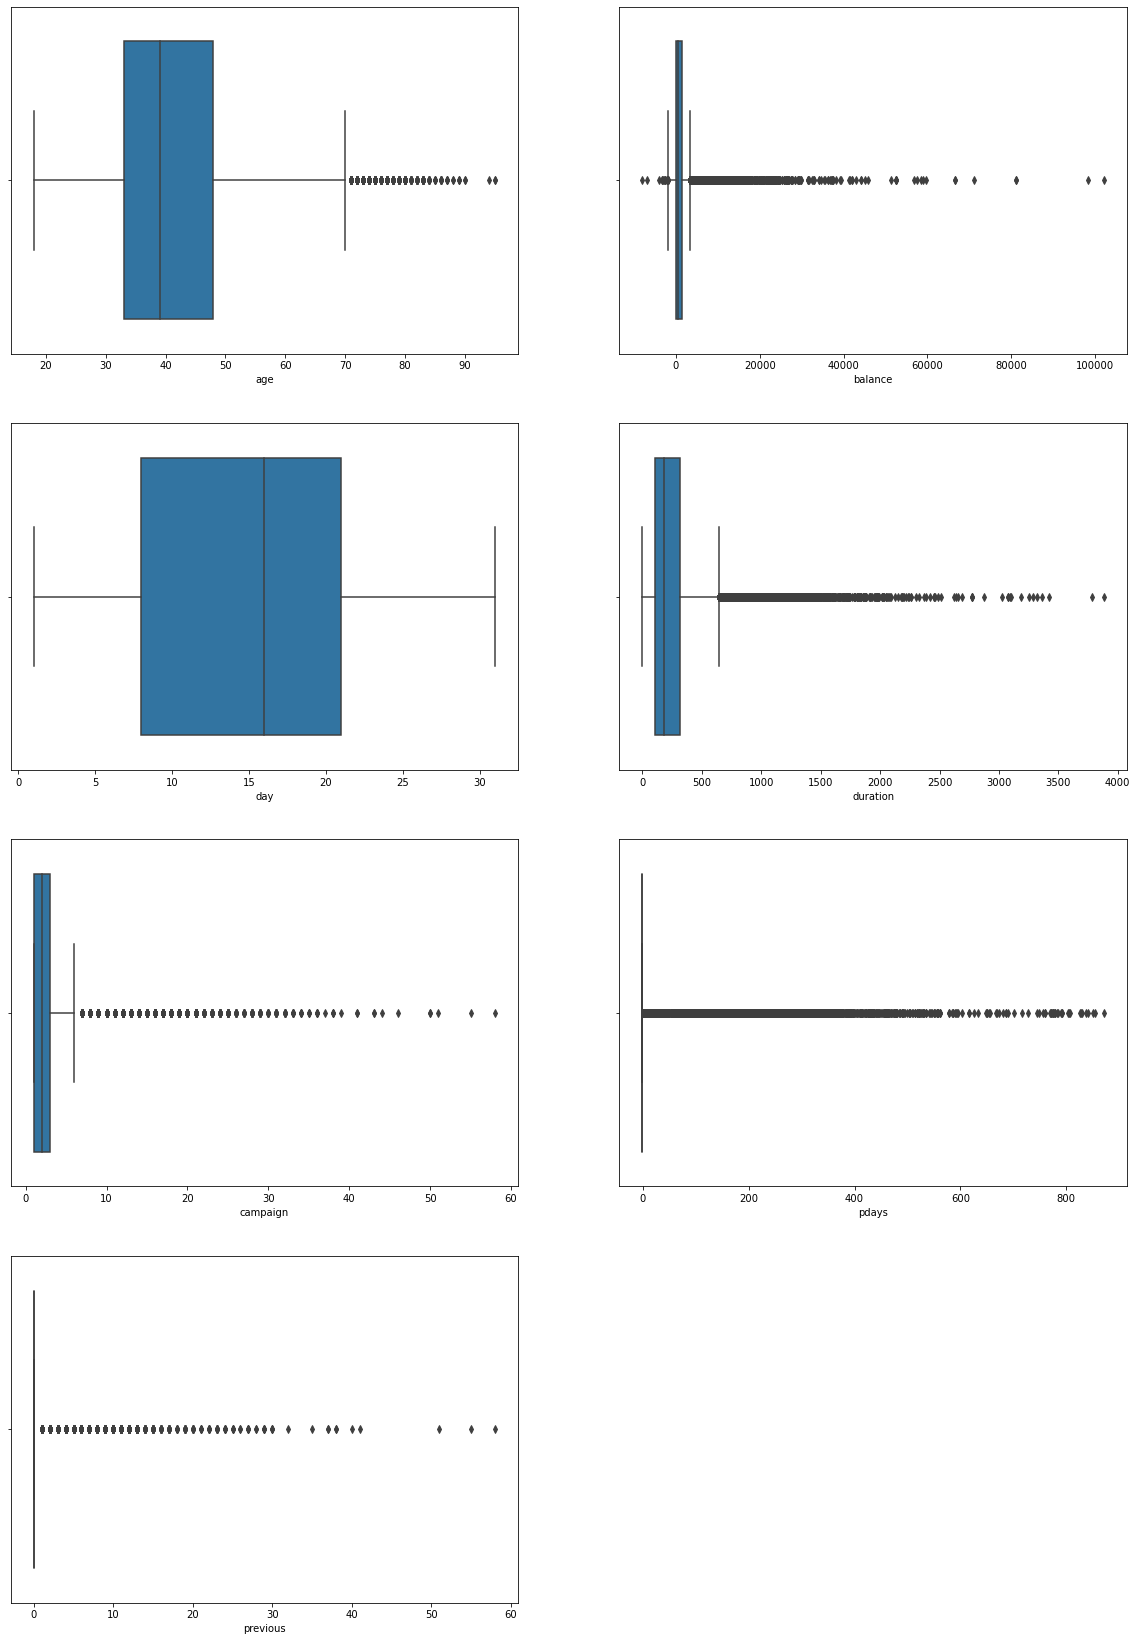

In [42]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in numerical_feature:
    ax = plt.subplot(8,2,plotnumber)
    sns.boxplot(bank_data_cleaned[feature])
    plotnumber += 1

In [43]:
bank_data_cleaned

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,house_enc,loan_enc,month_enc,y_enc
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,8,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,8,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,8,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,0,8,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,9,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,9,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,9,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,9,0


In [44]:
bank_data_cleaned.std()

age                10.512517
balance          3042.067902
day                 8.305850
duration          257.192112
campaign            3.064044
pdays             100.417091
previous            1.923023
job_enc             3.238398
marital_enc         0.609597
education_enc       0.664897
default_enc         0.133335
house_enc           0.496099
loan_enc            0.370777
month_enc           3.013655
y_enc               0.320529
dtype: float64

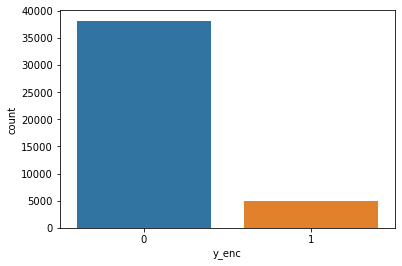

In [51]:
sns.countplot(bank_data_cleaned.y_enc)
plt.show()

### Model Building

In [46]:
X = bank_data_cleaned.drop(labels='y_enc', axis=1)
y = bank_data_cleaned['y_enc']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12,stratify=y,shuffle=True)

In [58]:
X_train.shape, X_test.shape

((34552, 14), (8639, 14))

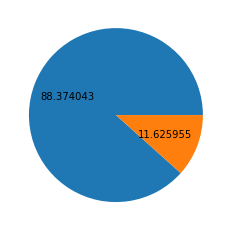

In [66]:
plt.pie(x = y_train.value_counts(),autopct='%2f')
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight={0:1,1:8})
log_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

### Model testing and Evalueation

In [81]:
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

**Evaluation for testing data**

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('accuracy', accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print('classification report', classification_report(y_train, y_pred_train))

accuracy 0.7647893030794165
[[23437  7098]
 [ 1029  2988]]
classification report               precision    recall  f1-score   support

           0       0.96      0.77      0.85     30535
           1       0.30      0.74      0.42      4017

    accuracy                           0.76     34552
   macro avg       0.63      0.76      0.64     34552
weighted avg       0.88      0.76      0.80     34552



**Evaluation for testing data**

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('accuracy', accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print('classification report', classification_report(y_test, y_pred_test))

accuracy 0.7657136242620673
[[5836 1799]
 [ 225  779]]
classification report               precision    recall  f1-score   support

           0       0.96      0.76      0.85      7635
           1       0.30      0.78      0.43      1004

    accuracy                           0.77      8639
   macro avg       0.63      0.77      0.64      8639
weighted avg       0.89      0.77      0.80      8639

